Eigenvalue = 0.999999221343389 with Error = 7.786566109668769e-07
Eigenvalue = 2.9999961071061363 with Error = 3.892893863710611e-06
Eigenvalue = 4.999989878780887 with Error = 1.0121219112591007e-05
Eigenvalue = 6.999980536418233 with Error = 1.9463581766743232e-05
Eigenvalue = 8.99996808199125 with Error = 3.191800874979833e-05
Eigenvalue = 10.999952539887087 with Error = 4.746011291345553e-05
Eigenvalue = 12.999934133794707 with Error = 6.586620529347442e-05
Eigenvalue = 14.99991455088104 with Error = 8.544911895924656e-05
Eigenvalue = 16.999904355098444 with Error = 9.564490155611338e-05
Eigenvalue = 18.999958999122434 with Error = 4.100087756597759e-05


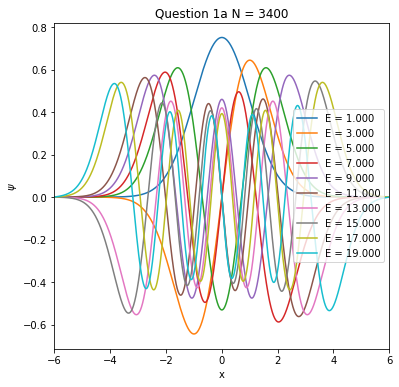

In [79]:
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))

def g(x):
    return -x**2

a = -6.0
b = 6.0
N = 3400

x = np.linspace(a, b, N+1)
h = (b-a)/N

# Difference matrix A (dimension N-1).

xx = x[1:-1]		# interior points only
A = np.zeros((N-1,N-1))
for n in range(N-1):
    A[n,n] = -2.0 + h**2*g(xx[n])
    if n > 0:
        A[n,n-1] = 1.0
    if n < N-2:
        A[n,n+1] = 1.0

eigenvalues,eigenfunctions = eig(A)
iarr = np.argsort(-eigenvalues)		# list in ascending order

n = 0
for i in iarr[:10]:
    psi = np.array([0.])
    psi = np.append(psi, eigenfunctions[:,i])
    psi = np.append(psi, 0.)
    norm = (h*(psi**2).sum())**0.5
    psi /= norm
    if psi.max() <= 0: psi = -psi
    eigi = -np.real(eigenvalues[i])/h**2
    print('Eigenvalue = {} with Error = {}'.format(eigi, 2*n+1 - eigi))
    plt.plot(x, psi, label='E = {:.3f}'.format(eigi))
    n += 1
    
plt.xlim(a, b)
plt.xlabel('x')
plt.ylabel(r'$\psi$')
plt.legend(loc='right')
plt.title('Question 1a N = '+str(N))
plt.show()

Eigenvalue = 0.9999999998377032 with Error = 1.6229684263180388e-10
Eigenvalue = 2.9999999988652215 with Error = 1.134778493394606e-09
Eigenvalue = 4.999999995953691 with Error = 4.046309065586229e-09
Eigenvalue = 6.999999989954669 with Error = 1.0045330789409945e-08
Eigenvalue = 8.999999981661023 with Error = 1.833897655956207e-08
Eigenvalue = 10.999999994042932 with Error = 5.957067727990761e-09
Eigenvalue = 13.000000249591634 with Error = -2.495916344713578e-07
Eigenvalue = 15.000002434229625 with Error = -2.434229624981299e-06
Eigenvalue = 17.000017111272214 with Error = -1.7111272214265227e-05
Eigenvalue = 19.000099738275296 with Error = -9.97382752956355e-05


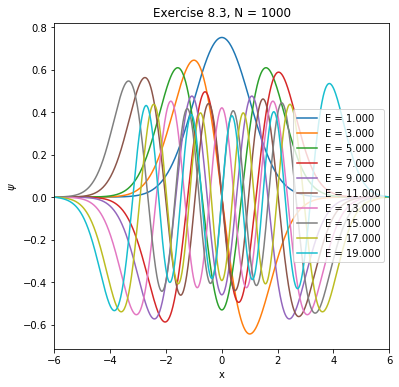

In [67]:
import math
import numpy as np
from scipy.linalg import solve, det
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))

def g(x):
    return -x**2

def s(x):
    return 0

a = -6.0
b = 6.0
ya = 0.0
yb = 0.0
N = 1000

x = np.linspace(a, b, N+1)
h = (b-a)/N

xx = x[1:-1]		# N-1 interior points only: indices n = 0 to N-2

# Difference matrix A (dimension N-1).

A = np.zeros((N-1,N-1))
B = np.zeros((N-1,N-1))

# Right-hand side r.
        
r = np.zeros(N-1)
r[0] = -ya*(1+h**2*g(a)/12)
r[-1] = -yb*(1+h**2*g(b)/12)

for n in range(N-1):
    A[n,n] = -2.0*(1 - 5*h**2*g(xx[n])/12)
    B[n,n] = 10.0
    if n > 0:
        A[n,n-1] = 1.0 + h**2*g(xx[n-1])/12
        B[n,n-1] = 1.0
    if n < N-2:
        A[n,n+1] = 1.0 + h**2*g(xx[n+1])/12
        B[n,n+1] = 1.0
    r[n] += h**2*(s(x[n+2])+10*s(x[n+1])+s(x[n]))/12	# note use of x here
    
eigenvalues,eigenfunctions = eig(np.matmul(np.linalg.inv(B),A))
iarr = np.argsort(-eigenvalues)		# list in ascending order

n = 0
for i in iarr[:10]:
    psi = np.array([0.])
    psi = np.append(psi, eigenfunctions[:,i])
    psi = np.append(psi, 0.)
    norm = (h*(psi**2).sum())**0.5
    psi /= norm
    if psi.max() <= 0: psi = -psi
    eigi = -np.real(eigenvalues[i])/h**2 * 12
    print('Eigenvalue = {} with Error = {}'.format(eigi, 2*n+1 - eigi))
    plt.plot(x, psi, label='E = {:.3f}'.format(eigi))
    n += 1
    
plt.xlim(a, b)
plt.xlabel('x')
plt.ylabel(r'$\psi$')
plt.legend(loc='right')
plt.title('Q1b, Numerov Method N = '+str(N))
plt.show()

Q2

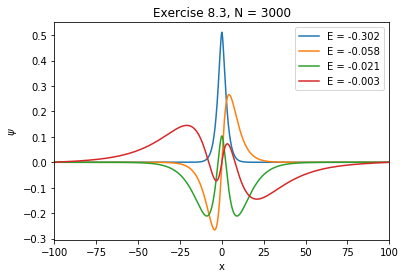

In [69]:
import math
import numpy as np
from scipy.linalg import solve, det
import matplotlib.pyplot as plt

def g(x):
    return np.exp(-np.sqrt(abs(x)))

def s(x):
    return 0

a = -100.0
b = 100.0
ya = 0.0
yb = 0.0
N = 2000

x = np.linspace(a, b, N+1)
h = (b-a)/N

xx = x[1:-1]		# N-1 interior points only: indices n = 0 to N-2

# Difference matrix A (dimension N-1).

A = np.zeros((N-1,N-1))
B = np.zeros((N-1,N-1))

# Right-hand side r.
        
r = np.zeros(N-1)
r[0] = -ya*(1+h**2*g(a)/12)
r[-1] = -yb*(1+h**2*g(b)/12)

for n in range(N-1):
    A[n,n] = -2.0*(1 - 5*h**2*g(xx[n])/12)
    B[n,n] = 10.0
    if n > 0:
        A[n,n-1] = 1.0 + h**2*g(xx[n-1])/12
        B[n,n-1] = 1.0
    if n < N-2:
        A[n,n+1] = 1.0 + h**2*g(xx[n+1])/12
        B[n,n+1] = 1.0
    r[n] += h**2*(s(x[n+2])+10*s(x[n+1])+s(x[n]))/12	# note use of x here

eigenvalues,eigenfunctions = eig(np.matmul(np.linalg.inv(B),A))
iarr = np.argsort(-eigenvalues)		# list in ascending order

for i in iarr[:4]:
    psi = np.array([0.])
    psi = np.append(psi, eigenfunctions[:,i])
    psi = np.append(psi, 0.)
    norm = (h*(psi**2).sum())**0.5
    psi /= norm
    if psi.max() <= 0: psi = -psi
    eigi = -np.real(eigenvalues[i])/h**2 * 12.0
    plt.plot(x, psi, label='E = {:.3f}'.format(eigi))

plt.xlim(a, b)
plt.xlabel('x')
plt.ylabel(r'$\psi$')
plt.legend(loc='best')
plt.title('Question 2 N = '+str(N))
plt.show()


Q3

a)

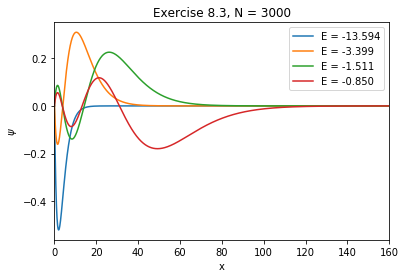

In [76]:
import math
import numpy as np
from scipy.linalg import solve, det
import matplotlib.pyplot as plt

def g(x):
    return 1/x

def s(x):
    return 0


a = 0.0
b = 160.0
N = 3000
l = 0

E0 = 54.4

x = np.linspace(a, b, N+1)
h = (b-a)/N

xx = x[1:-1]		# N-1 interior points only: indices n = 0 to N-2

# Difference matrix A (dimension N-1).

A = np.zeros((N-1,N-1))
B = np.zeros((N-1,N-1))

# Right-hand side r.
        
r = np.zeros(N-1)

for n in range(N-1):
    A[n,n] = -2.0*(1 - 5*h**2*g(xx[n])/12.0)
    B[n,n] = 10.0
    if n > 0:
        A[n,n-1] = 1.0 + h**2*g(xx[n-1])/12
        B[n,n-1] = 1.0
    if n < N-2:
        A[n,n+1] = 1.0 + h**2*g(xx[n+1])/12
        B[n,n+1] = 1.0

eigenvalues,eigenfunctions = eig(np.matmul(np.linalg.inv(B),A))
iarr = np.argsort(-eigenvalues)		# list in ascending order

for i in iarr[:4]:
    psi = np.array([0.])
    psi = np.append(psi, eigenfunctions[:,i])
    psi = np.append(psi, 0.)
    norm = (h*(psi**2).sum())**0.5
    psi /= norm
    if psi.max() <= 0: psi = -psi
    eigi = -np.real(eigenvalues[i])/h**2 * 12.0 * E0
    plt.plot(x, psi, label='E = {:.3f}'.format(eigi))

plt.xlim(a, b)
plt.xlabel('x')
plt.ylabel(r'$\psi$')
plt.legend(loc='best')
plt.title('Question 3a N = '+str(N))
plt.show()

b)

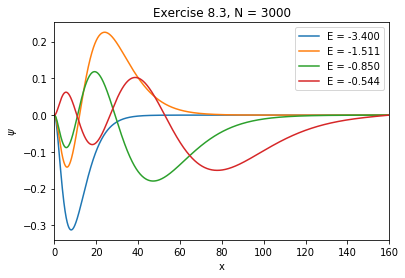

In [78]:
import math
import numpy as np
from scipy.linalg import solve, det
import matplotlib.pyplot as plt

def g(x):
    return 1.0/x - 2.0/(x**2)

def s(x):
    return 0


a = 0.0
b = 160.0
N = 3000
l = 0

E0 = 54.4

x = np.linspace(a, b, N+1)
h = (b-a)/N

xx = x[1:-1]		# N-1 interior points only: indices n = 0 to N-2

# Difference matrix A (dimension N-1).

A = np.zeros((N-1,N-1))
B = np.zeros((N-1,N-1))

# Right-hand side r.
        
r = np.zeros(N-1)

for n in range(N-1):
    A[n,n] = -2.0*(1 - 5*h**2*g(xx[n])/12.0)
    B[n,n] = 10.0
    if n > 0:
        A[n,n-1] = 1.0 + h**2*g(xx[n-1])/12
        B[n,n-1] = 1.0
    if n < N-2:
        A[n,n+1] = 1.0 + h**2*g(xx[n+1])/12
        B[n,n+1] = 1.0

eigenvalues,eigenfunctions = eig(np.matmul(np.linalg.inv(B),A))
iarr = np.argsort(-eigenvalues)		# list in ascending order

for i in iarr[:4]:
    psi = np.array([0.])
    psi = np.append(psi, eigenfunctions[:,i])
    psi = np.append(psi, 0.)
    norm = (h*(psi**2).sum())**0.5
    psi /= norm
    if psi.max() <= 0: psi = -psi
    eigi = -np.real(eigenvalues[i])/h**2 * 12.0 * E0
    plt.plot(x, psi, label='E = {:.3f}'.format(eigi))

plt.xlim(a, b)
plt.xlabel('x')
plt.ylabel(r'$\psi$')
plt.legend(loc='best')
plt.title('Question 3b N = '+str(N))
plt.show()

In [13]:
B

1.0

In [ ]:
x = [1,-2,3,-4,5,0,6,-7,8,-9,10]

In [ ]:
reset_vector(x)

In [ ]:
np.sign(9e-11)

In [57]:
 C = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [62]:
np.matmul(C, C)

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])